     |████████████████████████████████| 497.5 MB 24 kB/s 
     |████████████████████████████████| 462 kB 39.3 MB/s 


In [1]:
import tensorflow as tf

2023-10-15 20:37:54.155919: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-15 20:37:54.202294: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-15 20:37:54.203005: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-15 20:37:55.124133: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
print(tf.__version__)

2.12.0


In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [5]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [6]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [8]:
# Part 2 - Now let's make the ANN!

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout


In [10]:
# Initialising the ANN
classifier = Sequential()

In [11]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=11,activation='relu'))

In [12]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [13]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=1,activation='relu'))

In [14]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [15]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=50)

Epoch 1/50
536/536 [==============================] - 2s 2ms/step - loss: 1.2643 - accuracy: 0.7578 - val_loss: 1.0159 - val_accuracy: 0.7827
Epoch 2/50
536/536 [==============================] - 1s 3ms/step - loss: 0.6602 - accuracy: 0.7882 - val_loss: 0.5343 - val_accuracy: 0.7880
Epoch 3/50
536/536 [==============================] - 2s 3ms/step - loss: 0.4840 - accuracy: 0.8011 - val_loss: 0.4906 - val_accuracy: 0.8001
Epoch 4/50
536/536 [==============================] - 1s 2ms/step - loss: 0.4658 - accuracy: 0.8095 - val_loss: 0.4918 - val_accuracy: 0.8069
Epoch 5/50
536/536 [==============================] - 1s 2ms/step - loss: 0.4518 - accuracy: 0.8134 - val_loss: 0.4597 - val_accuracy: 0.8099
Epoch 6/50
536/536 [==============================] - 1s 2ms/step - loss: 0.4320 - accuracy: 0.8209 - val_loss: 0.4559 - val_accuracy: 0.8201
Epoch 7/50
536/536 [==============================] - 2s 3ms/step - loss: 0.4212 - accuracy: 0.8238 - val_loss: 0.4491 - val_accuracy: 0.8167
Epoch 

In [16]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


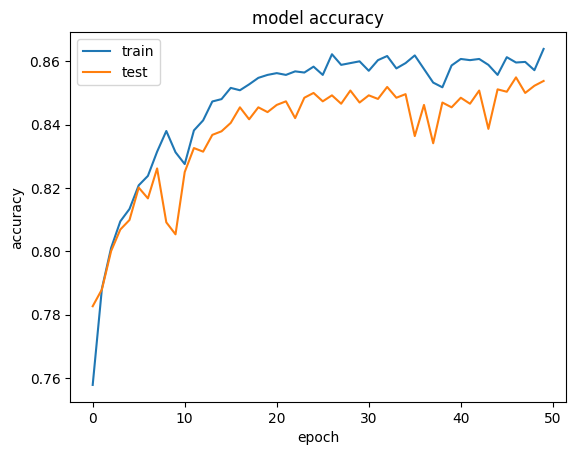

In [17]:

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

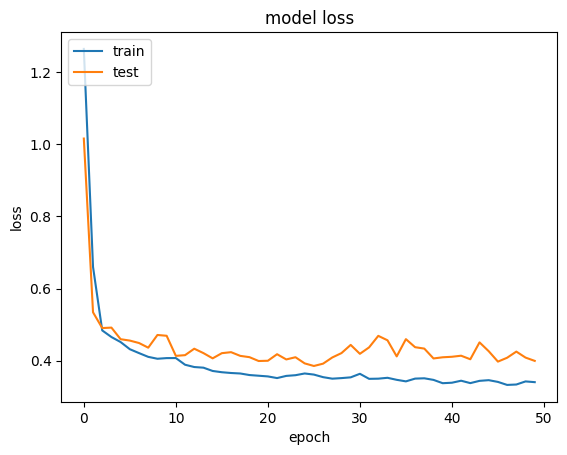

In [18]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 2ms/step


In [20]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1522,   73],
       [ 206,  199]])

In [21]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [22]:
score

0.8605